In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# dtypes = {
#    'Id': np.int64,
#    'Name': str,
#    'Platform': str,
#    'Year_of_Release': np.int64,
#    'Genre': str,
#    'Publisher': str,
#    'NA_Sales': np.float64,
#    'EU_Sales': np.float64,
#    'JP_Sales': np.float64,
#    'Other_Sales': np.float64,
#    'Global_Sales': np.float64
#}

d1 = pd.read_csv('dataset1.csv', sep=',', encoding='windows-1252')

In [3]:
# a. Quantas linhas e quantas colunas esse dataset possui?
d1

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,NaN,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,NaN,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,NaN,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,"1,0",31.37
...,...,...,...,...,...,...,...,...,...,...,...
101,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,NaN
102,97,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.27,1.37,2.43,0.48,NaN
103,98,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.56,2.35,0.98,0.62,NaN
104,99,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.7,0.19,7.46


In [4]:
# b. Faça um dicionário das colunas contendo o nome da coluna, o tipo do dado, e seu significado.
d1.dtypes

Id                  int64
Name               object
Platform           object
Year_of_Release    object
Genre              object
Publisher          object
NA_Sales           object
EU_Sales           object
JP_Sales           object
Other_Sales        object
Global_Sales       object
dtype: object

# Dicionário de Dados

    Nome            | Tipo      | Descrição
    Id              | Inteiro   | id da tabela
    Name            | String    | Nome do jogo
    Platform        | String    | Plataforma do jogo
    Year_of_Release | Inteiro   | Ano de Lançamento
    Genre           | String    | Gênero do Jogo
    Publisher       | String    | Empresa que lançou o jogo
    NA_Sales        | Float     | Número de vendas nos Estatus Unidos
    EU_Sales        | Float     | Número de vendas na Europa
    JP_Sales        | Float     | Número de vendas no Japão
    Other_Sales     | Float     | Número de vendas em outros paises
    Global_Sales    | Float     | Número de vendas no mundo


## c. Descreva se o Dataset está em formato Tidy e explique o motivo. Caso não esteja, crie uma versão Tidy para a exploração.

O dataset não está em formato Tidy.

Eu dividiria o Dataset1 em dois outros datasets:
1. As informações dos jogos;
2. As informações das vendas por região;

### Os cabeçalhos (a primeira linha da tabela) são valores, não o nome das variáveis;

As colunas de vendas representam valores, não as variáveis. Essas colunas deveriam ser transformadas
em uma nova coluna (chamada "Region") e haveria outra coluna para armazenar os respectivos quantitativos

Dataset Games:

        Id | Name       | Platform   | Year_of_Release | Genre    | Publisher
        1  | Wii Sports | NaN        | 2006            | Sports   | Nintendo

Dataset Sales:

        Id_Game | Region | Sales
        1       | NA     | 21.12
        1       | EU     | 28.96
        1       | JP     | 3.77	
        1       | Others | 8.45

A coluna "Global Sales" é uma coluna calculada. Talvez pudesse ter sido deixada de fora, já que ela pode ser
obtida somando-se as vendas das demais regiões junto com a coluna "Other_Sales"

## d. Analise o seu dicionário e adicione mais uma informação. Tipo da variável: Categórica ou Quantitativa. Acrescente ainda as subdivisões:

# Dicionário de Dados

    Nome            | Tipo      | Descrição                             | Tipo da Variável                          
    Id              | Inteiro   | id da tabela                          | Categórica Nominal
    Name            | String    | Nome do jogo                          | Categórica Nominal
    Platform        | String    | Plataforma do jogo                    | Categórica Nominal
    Year_of_Release | Inteiro   | Ano de Lançamento                     | Quantitativa Discreta
    Genre           | String    | Gênero do Jogo                        | Categórica Nominal
    Publisher       | String    | Empresa que lançou o jogo             | Categórica Nominal
    NA_Sales        | Float     | Número de vendas nos Estatus Unidos   | Quantitativa Contínua  
    EU_Sales        | Float     | Número de vendas na Europa            | Quantitativa Contínua
    JP_Sales        | Float     | Número de vendas no Japão             | Quantitativa Contínua
    Other_Sales     | Float     | Número de vendas em outros paises     | Quantitativa Contínua
    Global_Sales    | Float     | Número de vendas no mundo             | Quantitativa Contínua

## 02. Validação de dados e entendimento das variáveis

a. Quantos registros faltantes (dados nulos) por coluna?

In [5]:
d1.isnull().sum(axis = 0)

Id                  0
Name                1
Platform            9
Year_of_Release     1
Genre               1
Publisher           1
NA_Sales            1
EU_Sales            1
JP_Sales            5
Other_Sales         1
Global_Sales       29
dtype: int64

b. Avalie a unicidade dos dados. Há duplicatas de linhas?

In [6]:
d1[d1['Id'].isin(d1['Id'][d1.duplicated()])].sort_values(by='Id', ascending=True)

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04
17,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04
61,61,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.73,2.56,0.04,0.91,10.25
62,61,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.73,2.56,0.04,0.91,10.25
79,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,NaN
80,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,NaN
81,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,NaN
90,86,The Sims 3,PC,2009,Simulation,Electronic Arts,0.99,6.42,NaN,0.6,8.01
91,86,The Sims 3,PC,2009,Simulation,Electronic Arts,0.99,6.42,NaN,0.6,8.01


c. Há algum problema com os tipos das variáveis?

Year_of_Release: invalid literal for int() with base 10: '9/17/2013'

In [7]:
d1[d1['Year_of_Release'] == '9/17/2013']

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
24,24,Grand Theft Auto V,X360,9/17/2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27


Campos Númericos com vírgula ao invés de ponto

In [8]:
d1[(d1['NA_Sales'] == '9,0') | (d1['EU_Sales'] == '3,0') | (d1['JP_Sales'] == '3,0') | (d1['Other_Sales'] == '1,0')| (d1['Global_Sales'] == '21,79')]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,"1,0",31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,"9,0",6.18,7.2,0.71,23.1
15,16,Wii Fit Plus,NaN,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,"21,79"
54,54,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,"3,0",2.14,0.78,10.81
73,72,Donkey Kong Country,SNES,1994,Platform,Nintendo,4.36,1.71,"3,0",0.23,9.3


d. Descreva o conteúdo de cada coluna, se atentando ao tipo de variável

Categóricas

In [9]:
# Id, Name, Platform, Genre, Publisher
for col in d1[['Name', 'Platform', 'Genre', 'Publisher']].columns:
    print(d1[col].describe())
    print('\n')

count                    105
unique                    90
top       Grand Theft Auto V
freq                       4
Name: Name, dtype: object


count     97
unique    19
top       DS
freq      13
Name: Platform, dtype: object


count         105
unique         11
top       Shooter
freq           22
Name: Genre, dtype: object


count          105
unique          14
top       Nintendo
freq            47
Name: Publisher, dtype: object




Quantitativas

Limpando dados para converter as colunas em numéricas e poder extrair as estatísticas básicas

In [10]:
d1['Year_of_Release'] = d1['Year_of_Release'].str[-4:]
d1['Year_of_Release'] = d1['Year_of_Release'].astype('Int64')
d1.iloc[24]

Id                                   24
Name                 Grand Theft Auto V
Platform                           X360
Year_of_Release                    2013
Genre                            Action
Publisher          Take-Two Interactive
NA_Sales                           9.66
EU_Sales                           5.14
JP_Sales                           0.06
Other_Sales                        1.41
Global_Sales                      16.27
Name: 24, dtype: object

In [11]:
d1['NA_Sales'] = d1['NA_Sales'].str.replace(',', '.')
d1['EU_Sales'] = d1['EU_Sales'].str.replace(',', '.')
d1['JP_Sales'] = d1['JP_Sales'].str.replace(',', '.')
d1['Other_Sales'] = d1['Other_Sales'].str.replace(',', '.')
d1['Global_Sales'] = d1['Global_Sales'].str.replace(',', '.')

d1['NA_Sales'] = d1['NA_Sales'].astype(float)
d1['EU_Sales'] = d1['EU_Sales'].astype(float)
d1['JP_Sales'] = d1['JP_Sales'].astype(float)
d1['Other_Sales'] = d1['Other_Sales'].astype(float)
d1['Global_Sales'] = d1['Global_Sales'].astype(float)

In [12]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'Year_of_Release', d1['Year_of_Release'].min(), d1['Year_of_Release'].max(), round(d1['Year_of_Release'].mean(), 2), round(d1['Year_of_Release'].std(), 2), d1['Year_of_Release'].median(), d1['Year_of_Release'].quantile(0.25), d1['Year_of_Release'].quantile(0.75)))

Year_of_Release
 Min: 100
 Max: 3007
 Média: 1994.5
 Desvio Padrão: 211.94
 Mediana: 2008.0
 P25: 2001
 P75: 2012



In [13]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'NA_Sales', d1['NA_Sales'].min(), d1['NA_Sales'].max(), round(d1['NA_Sales'].mean(), 2), 
        round(d1['NA_Sales'].std(), 2), d1['NA_Sales'].median(), d1['NA_Sales'].quantile(0.25), d1['NA_Sales'].quantile(0.75)))

NA_Sales
 Min: 0.66
 Max: 41.36
 Média: 6.83
 Desvio Padrão: 5.83
 Mediana: 5.7
 P25: 3.74
 P75: 7.97



In [14]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'EU_Sales', d1['EU_Sales'].min(), d1['EU_Sales'].max(), round(d1['EU_Sales'].mean(), 2), 
        round(d1['EU_Sales'].std(), 2), d1['EU_Sales'].median(), d1['EU_Sales'].quantile(0.25), d1['EU_Sales'].quantile(0.75)))

EU_Sales
 Min: 0.01
 Max: 28.96
 Média: 4.31
 Desvio Padrão: 3.46
 Mediana: 3.48
 P25: 2.36
 P75: 5.35



In [15]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'JP_Sales', d1['JP_Sales'].min(), d1['JP_Sales'].max(), round(d1['JP_Sales'].mean(), 2), 
        round(d1['JP_Sales'].std(), 2), d1['JP_Sales'].median(), d1['JP_Sales'].quantile(0.25), d1['JP_Sales'].quantile(0.75)))

JP_Sales
 Min: 0.01
 Max: 10.22
 Média: 2.04
 Desvio Padrão: 2.04
 Mediana: 1.58
 P25: 0.24
 P75: 3.28



In [16]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'Other_Sales', d1['Other_Sales'].min(), d1['Other_Sales'].max(), round(d1['Other_Sales'].mean(), 2), 
        round(d1['Other_Sales'].std(), 2), d1['Other_Sales'].median(), d1['Other_Sales'].quantile(0.25), d1['Other_Sales'].quantile(0.75)))

Other_Sales
 Min: 0.08
 Max: 10.57
 Média: 1.33
 Desvio Padrão: 1.54
 Mediana: 0.91
 P25: 0.58
 P75: 1.57



In [17]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'Global_Sales', d1['Global_Sales'].min(), d1['Global_Sales'].max(), round(d1['Global_Sales'].mean(), 2), 
        round(d1['Global_Sales'].std(), 2), d1['Global_Sales'].median(), d1['Global_Sales'].quantile(0.25), d1['Global_Sales'].quantile(0.75)))

Global_Sales
 Min: 7.39
 Max: 82.53
 Média: 15.94
 Desvio Padrão: 10.74
 Mediana: 12.66
 P25: 9.87
 P75: 20.15



In [18]:
df = d1[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006,41.36,28.96,3.77,8.45,82.53
1,1985,29.08,3.58,6.81,0.77,40.24
2,2008,15.68,12.76,3.79,3.29,35.52
3,2009,15.61,10.93,3.28,2.95,32.77
4,1996,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
101,1997,3.78,2.17,1.31,0.31,NaN
102,2014,3.27,1.37,2.43,0.48,NaN
103,2010,3.56,2.35,0.98,0.62,NaN
104,1988,5.39,1.18,0.70,0.19,7.46


In [19]:
d1['NA_Sales'].fillna(0, inplace=True)
d1['EU_Sales'].fillna(0, inplace=True)
d1['JP_Sales'].fillna(0, inplace=True)
d1['Other_Sales'].fillna(0, inplace=True)
d1['Year_of_Release'].fillna(d1['Year_of_Release'].mode()[0], inplace=True)

In [20]:
mask = (d1['Global_Sales'].isna() == True)
d_valid = d1[mask]

d1.loc[mask, 'Global_Sales'] = d1['NA_Sales'] + d1['EU_Sales']	+ d1['JP_Sales'] + d1['Other_Sales']
d1

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,NaN,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,NaN,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,NaN,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
101,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.57
102,97,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55
103,98,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51
104,99,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46


In [21]:
d1.isna().sum()

Id                 0
Name               1
Platform           9
Year_of_Release    0
Genre              1
Publisher          1
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

f. Como está a distribuição dos dados? Existem valores discrepantes? Descreva o que pode significar.

<AxesSubplot:>

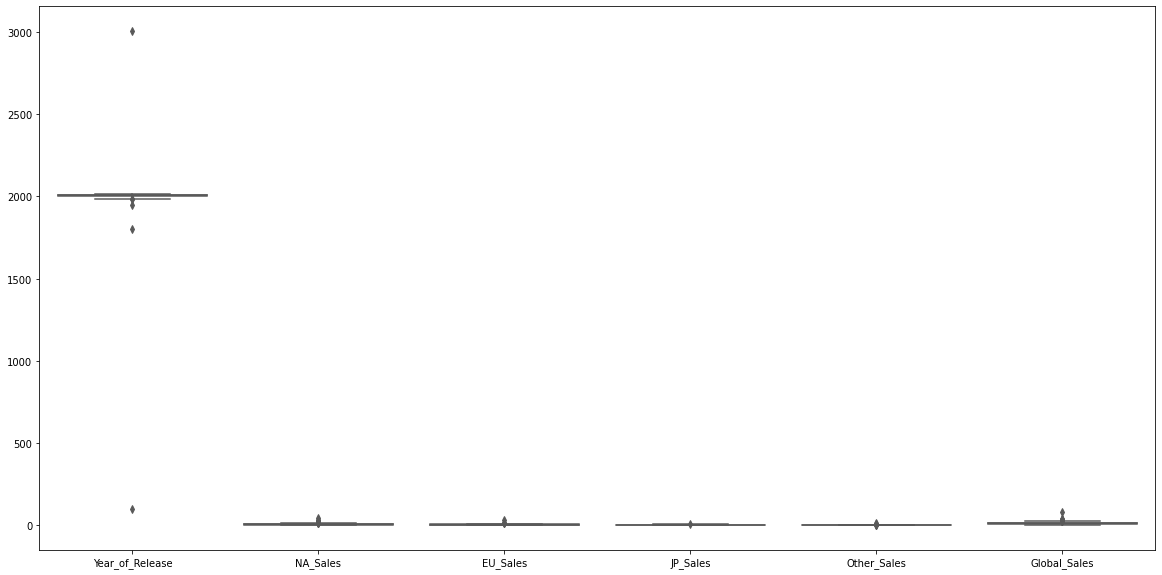

In [22]:
df = d1[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, palette='Set2', dodge=True)

Provavelmente houve erro na coleta da coluna Year_of_Release, tendo em vista os outliers (inferior e superior)

In [23]:
df = d1[['Name', 'Platform', 'Genre', 'Publisher']]

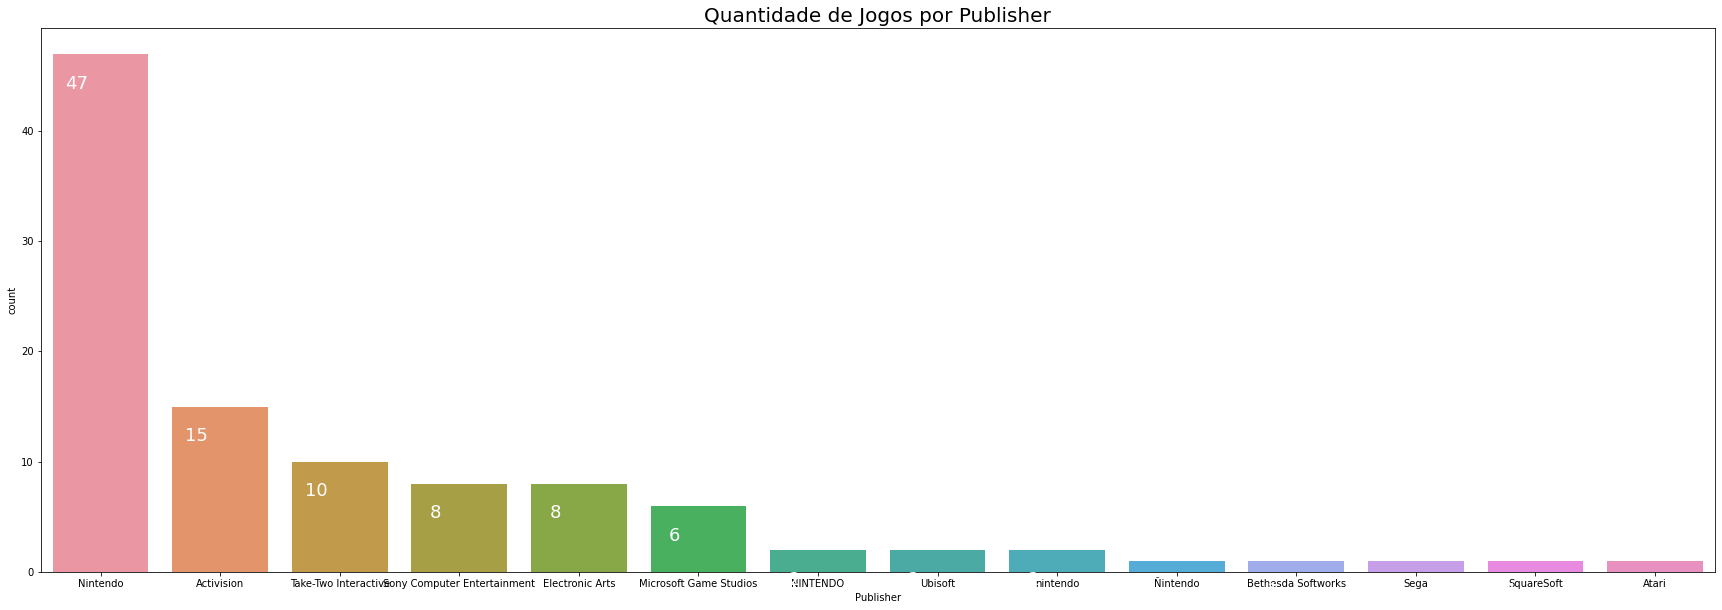

In [24]:
plt.figure(figsize=(30, 10))
ax = sns.countplot(data=df, 
                   x='Publisher', 
                   orient='v',
                   order=d1['Publisher'].value_counts().index)
ax.set_title('Quantidade de Jogos por Publisher', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

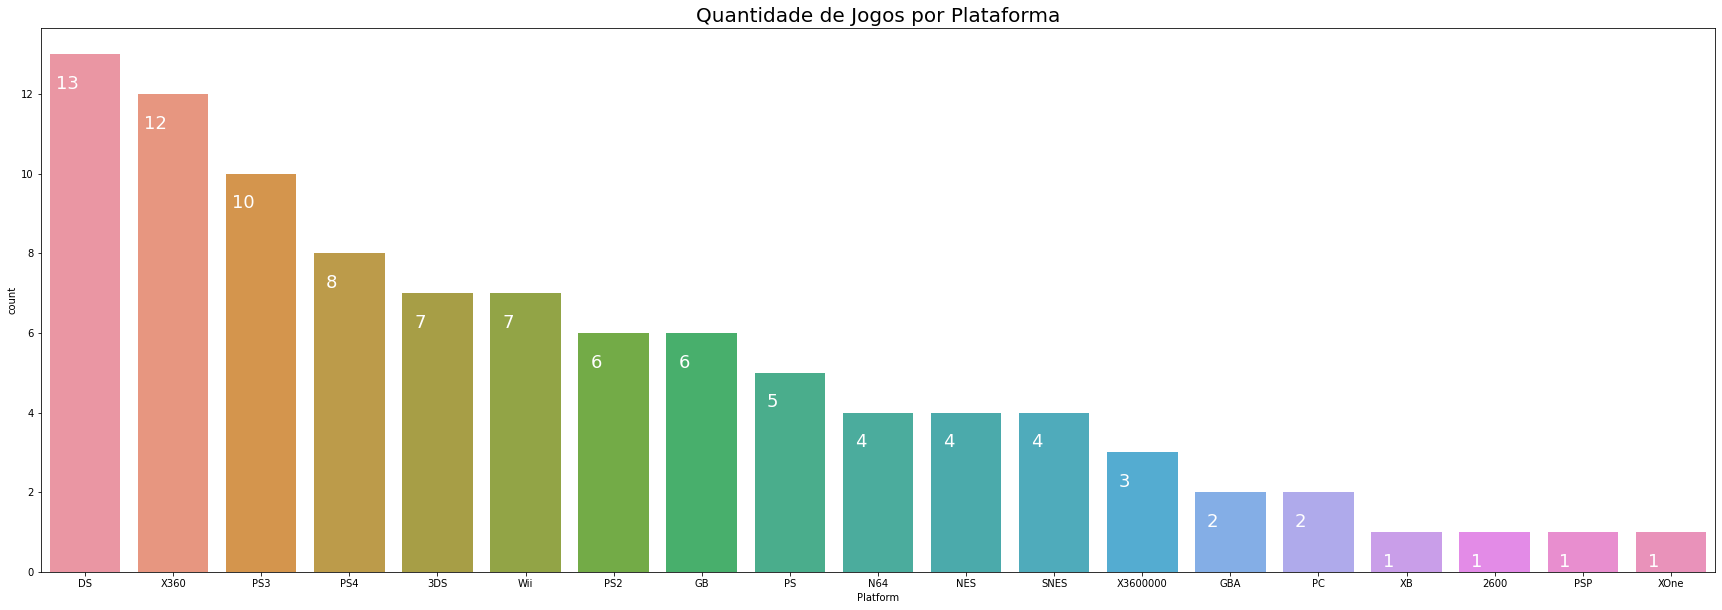

In [25]:
plt.figure(figsize=(30, 10))
ax = sns.countplot(data=df, 
                   x='Platform', 
                   orient='v',
                   order=d1['Platform'].value_counts().index)
ax.set_title('Quantidade de Jogos por Plataforma', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

Possíveis erros na coleta dos dados (X3600000 e X360)

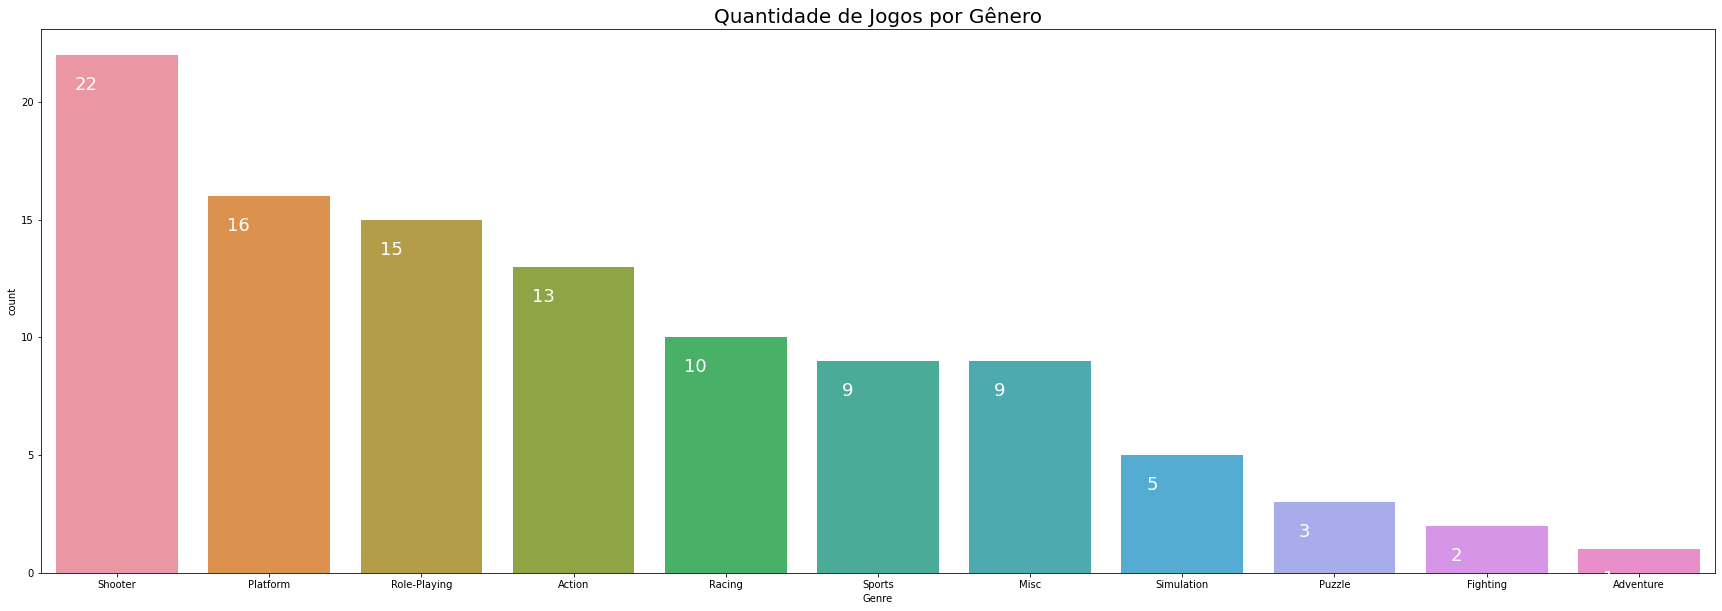

In [26]:
plt.figure(figsize=(30, 10))
ax = sns.countplot(data=df, 
                   x='Genre', 
                   orient='v',
                   order=d1['Genre'].value_counts().index)
ax.set_title('Quantidade de Jogos por Gênero', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

g. Quais conclusões você pode tirar até aqui? Você está lidando com dados de qualidade? Existe alguma relação com a coleta? Há dados pessoais expostos?

No geral, eu diria que são bons dados. Há alguns problemas, mas há como contorná-los. Por exemplo, a ausência de valores nas colunas de vendas e a Global_Sales podendo ser calculada a partir das demais colunas. Algumas linhas duplicadas podem ser facilmente removidas. Alguns valores nas linhas precisam ser corrigidos, como no caso da plataforma ('X360' e 'X3600000') e há dúvida sobre a coluna Name ter registros multivalorados ('Pokemon Ruby/Pokemon Sapphire')

## 03. Limpeza dos Dados

In [27]:
# Valores nulos
d1.isna().sum()

Id                 0
Name               1
Platform           9
Year_of_Release    0
Genre              1
Publisher          1
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [28]:
# Remover o registro que não possui nome, pois é apenas 1
d1 = d1[d1['Name'].isnull() == False]
d1.isna().sum()

Id                 0
Name               0
Platform           8
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [29]:
# Registros com Platform nula parecem ser todos do Wii
mask = (d1['Platform'].isna() == True)
d_valid = d1[mask]

d1.loc[mask, 'Platform'] = 'Wii'
d1.isna().sum()

Id                 0
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [30]:
d1

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
101,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.57
102,97,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55
103,98,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51
104,99,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
